In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import rbf
import utils

## 1-Batch mode training using least squares - supervised learning of network weights

In [2]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)



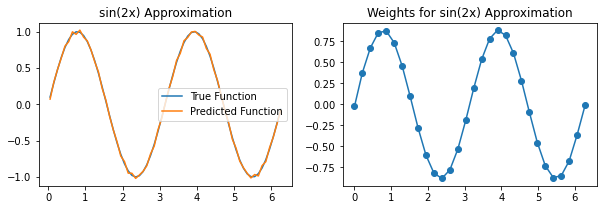

In [3]:
# Number of RBF nodes 
n = 30
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y1_train[:, np.newaxis])
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

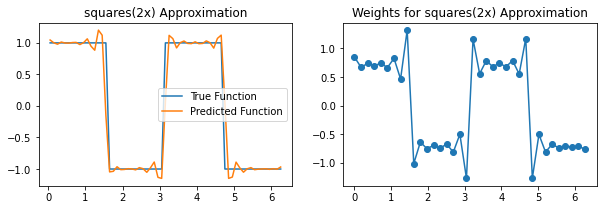

In [4]:
# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

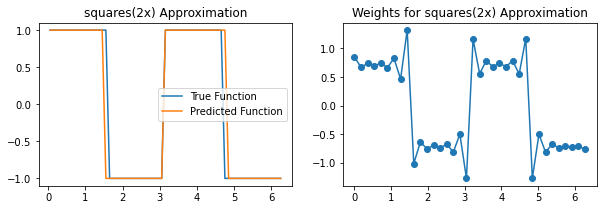

In [5]:
# How can you simply transform the output of your RBF network to reduce the residual error to 0 for the square(2x) problem

# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
y2_pred = network.make_prediction(X_test[:, np.newaxis])
y2_pred = utils.threshold_function(y2_pred, threshold=0)
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

Num RBF Units: 5, Error1: 0.6335172214839497, Error2: 0.9647729440820156
Num RBF Units: 10, Error1: 0.4115298777349028, Error2: 0.6318926602904464
Num RBF Units: 15, Error1: 0.27894442531280594, Error2: 0.46110052570969995
Num RBF Units: 20, Error1: 0.1509718669284176, Error2: 0.25929809087453426
Num RBF Units: 25, Error1: 0.05894319754359946, Error2: 0.1909180933035525
Num RBF Units: 30, Error1: 0.01737432502581867, Error2: 0.1047376649291765
Num RBF Units: 35, Error1: 0.004566716621616419, Error2: 0.08953264568707932
Num RBF Units: 40, Error1: 0.0014137706799768129, Error2: 0.09320584589677285
Num RBF Units: 45, Error1: 0.0009755430399576682, Error2: 0.09596182248320069
Num RBF Units: 50, Error1: 0.0008208607461986251, Error2: 0.0968527674284165
Num RBF Units: 55, Error1: 0.0007436321519040661, Error2: 0.09461918062535417
Num RBF Units: 60, Error1: 0.0006757086710010549, Error2: 0.11863672927517295


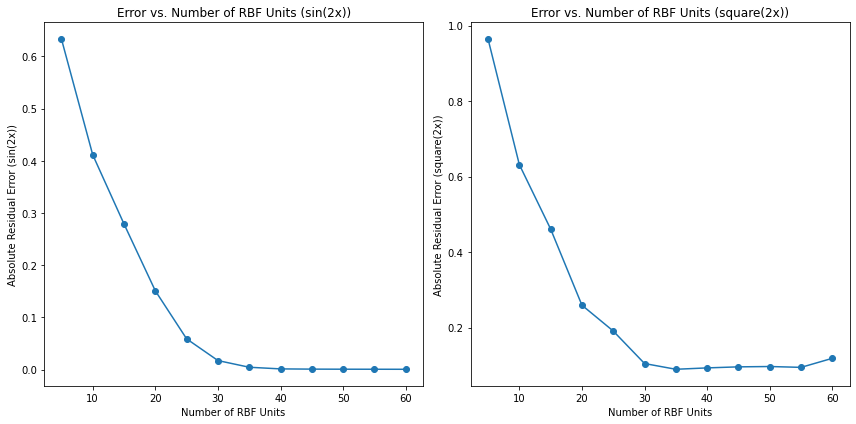

In [6]:
# Vary the number of RBF units
num_rbf_units_range = [k for k in range(5, 65, 5)] 

# Dictionary to store results
results = {'num_rbf_units': [], 'error1': [], 'error2': []}
# Set a common variance for all nodes
variance = 0.1

for num_rbf_units in num_rbf_units_range:
    # Place RBF nodes evenly spaced in the input space
    centers = np.linspace(interval_start, interval_end, num_rbf_units)

    network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
    network1.batch_least_squares(X_train[:, np.newaxis], y1_train[:, np.newaxis])
    y1_pred = network1.make_prediction(X_test[:, np.newaxis])
    # Calculate absolute residual errors
    error1 = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

    network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
    network2.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
    y2_pred = network2.make_prediction(X_test[:, np.newaxis])
    # Calculate absolute residual errors
    error2 = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)


    # Store results
    results['num_rbf_units'].append(num_rbf_units)
    results['error1'].append(error1)
    results['error2'].append(error2)

# Print and plot the results 
for i in range(len(num_rbf_units_range)):
    print(f"Num RBF Units: {results['num_rbf_units'][i]}, Error1: {results['error1'][i]}, Error2: {results['error2'][i]}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results['num_rbf_units'], results['error1'], marker='o')
plt.xlabel('Number of RBF Units')
plt.ylabel('Absolute Residual Error (sin(2x))')
plt.title('Error vs. Number of RBF Units (sin(2x))')

plt.subplot(1, 2, 2)
plt.plot(results['num_rbf_units'], results['error2'], marker='o')
plt.xlabel('Number of RBF Units')
plt.ylabel('Absolute Residual Error (square(2x))')
plt.title('Error vs. Number of RBF Units (square(2x))')

plt.tight_layout()
plt.show()

## 2-Regression with noise

In [7]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1
variance_noise = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)
# adding noise
y1_train = utils.add_noise(y1_train, variance=variance_noise)
y2_train = utils.add_noise(y2_train, variance=variance_noise)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)
# adding noise
y1_test = utils.add_noise(y1_test, variance=variance_noise)
y2_test = utils.add_noise(y2_test, variance=variance_noise)


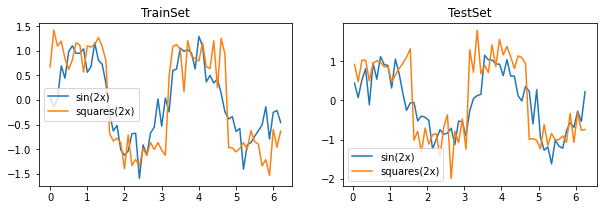

In [8]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(X_train, y1_train, label='sin(2x)')
plt.plot(X_train, y2_train, label='squares(2x)',)
plt.legend()
plt.title('TrainSet')

plt.subplot(1, 2, 2)
plt.plot(X_test, y1_test, label='sin(2x)')
plt.plot(X_test, y2_test, label='squares(2x)',)
plt.legend()
plt.title('TestSet')

plt.show()

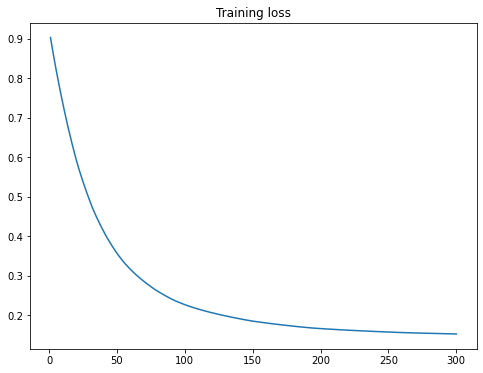

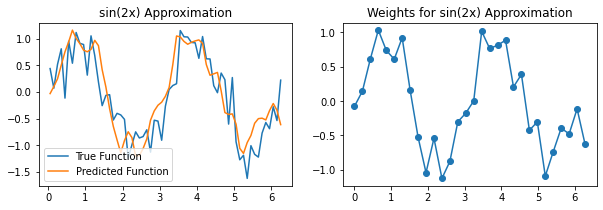

In [9]:
# Number of RBF nodes 
n = 30
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

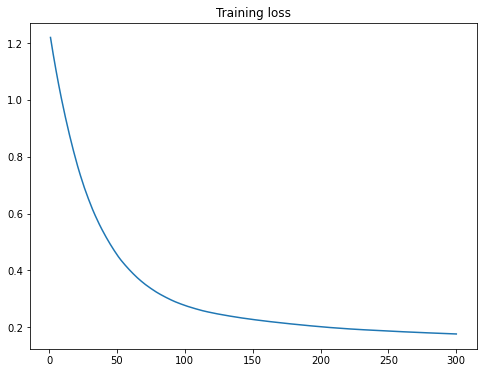

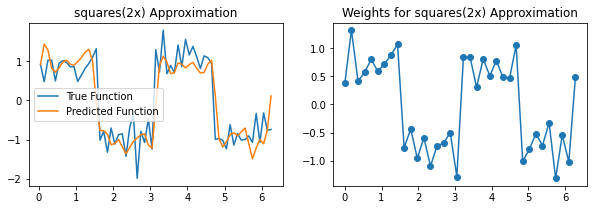

In [10]:
# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

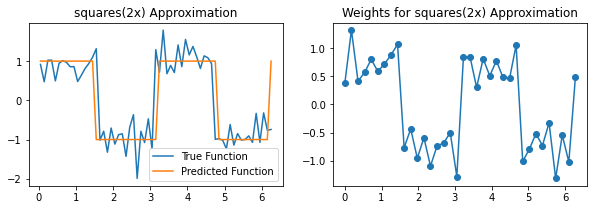

In [11]:
y2_pred = utils.threshold_function(y2_pred, threshold=0)
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

In [12]:
# Vary the number of RBF units and widths
num_rbf_units_range = [15, 20, 25, 30, 35]
variance_range = [0.1, 0.2, 0.3, 0.4, 0.5]

# Dictionary to store results
results_batch_learning = {'num_rbf_units': [], 'variance': [], 'error1': [], 'error2': []}
results_online_learning = {'num_rbf_units': [], 'variance': [], 'error1': [], 'error2': []}

for num_rbf_units in num_rbf_units_range:
    for variance in variance_range:

        network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network1.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01)
        y1_pred = network1.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error1 = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

        network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network2.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01)
        y2_pred = network2.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error2 = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)

        # Store results for batch learning
        results_batch_learning['num_rbf_units'].append(num_rbf_units)
        results_batch_learning['variance'].append(variance)
        results_batch_learning['error1'].append(error1)
        results_batch_learning['error2'].append(error2)

        network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network1.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01)
        y1_pred = network1.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error1_online = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

        network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network2.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01)
        y2_pred = network2.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error2_online = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)

        
        # Store results for online learning
        results_online_learning['num_rbf_units'].append(num_rbf_units)
        results_online_learning['variance'].append(variance)
        results_online_learning['error1'].append(error1_online)
        results_online_learning['error2'].append(error2_online)

Results for Batch Learning:
Num RBF Units: 15, Varianve: 0.1, Error1: 0.33748277681228206, Error2: 0.3297169702101436
Num RBF Units: 15, Varianve: 0.2, Error1: 0.3011357274471072, Error2: 0.3666850211899216
Num RBF Units: 15, Varianve: 0.3, Error1: 0.28419693054867146, Error2: 0.3895699491879985
Num RBF Units: 15, Varianve: 0.4, Error1: 0.2818054565799465, Error2: 0.36528891196049745
Num RBF Units: 15, Varianve: 0.5, Error1: 0.30672071385184535, Error2: 0.38025914704371777
Num RBF Units: 20, Varianve: 0.1, Error1: 0.3196818901246854, Error2: 0.3422492428326175
Num RBF Units: 20, Varianve: 0.2, Error1: 0.30504848223947834, Error2: 0.3590682561698166
Num RBF Units: 20, Varianve: 0.3, Error1: 0.2829580544425103, Error2: 0.37166755957947006
Num RBF Units: 20, Varianve: 0.4, Error1: 0.29059477699847336, Error2: 0.38872440614261533
Num RBF Units: 20, Varianve: 0.5, Error1: 0.28493915067602654, Error2: 0.407170376847888
Num RBF Units: 25, Varianve: 0.1, Error1: 0.33049007928963686, Error2: 0.

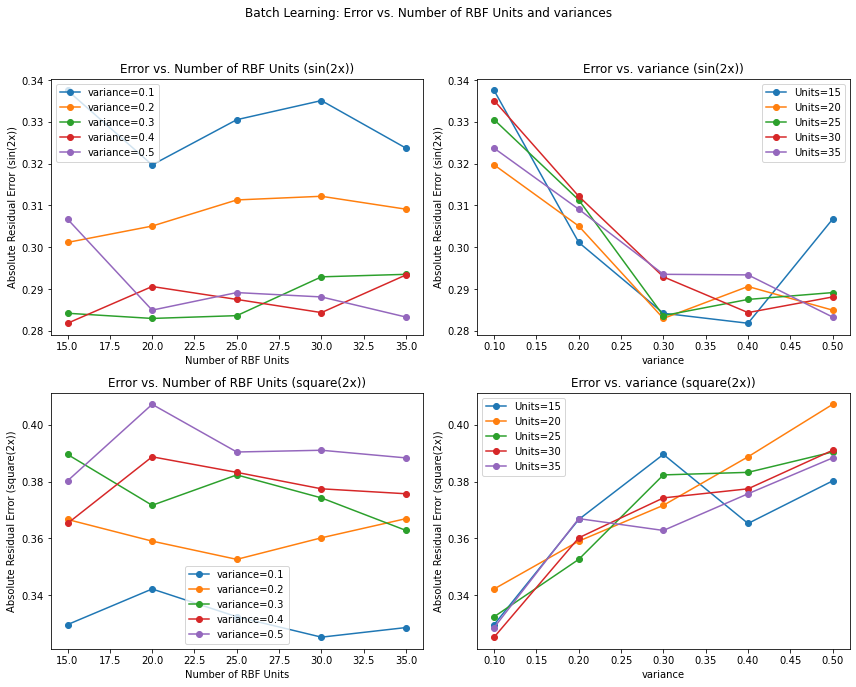

In [13]:
# Print and plot the results for batch learning
print("Results for Batch Learning:")
for i in range(len(results_batch_learning['num_rbf_units'])):
    print(f"Num RBF Units: {results_batch_learning['num_rbf_units'][i]}, Varianve: {results_batch_learning['variance'][i]}, "
          f"Error1: {results_batch_learning['error1'][i]}, Error2: {results_batch_learning['error2'][i]}")

# Plot the results for batch learning
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Batch Learning: Error vs. Number of RBF Units and variances')

for i, function_name in enumerate(['sin(2x)', 'square(2x)']):
    ax = axes[i, 0]
    ax.set_title(f'Error vs. Number of RBF Units ({function_name})')
    for variance in variance_range:
        condition = np.array([results_batch_learning['variance'][j] == variance for j in range(len(results_batch_learning['variance']))])
        ax.plot(np.array(results_batch_learning['num_rbf_units'])[condition], np.array(results_batch_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'variance={variance}')
    ax.set_xlabel('Number of RBF Units')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

    ax = axes[i, 1]
    ax.set_title(f'Error vs. variance ({function_name})')
    for num_rbf_units in num_rbf_units_range:
        condition = np.array([results_batch_learning['num_rbf_units'][j] == num_rbf_units for j in range(len(results_batch_learning['num_rbf_units']))])
        ax.plot(np.array(results_batch_learning['variance'])[condition], np.array(results_batch_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'Units={num_rbf_units}')
    ax.set_xlabel('variance')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Results for Online Learning:
Num RBF Units: 15, Variance: 0.1, Error1: 0.32210096043944825, Error2: 0.33804738410175295
Num RBF Units: 15, Variance: 0.2, Error1: 0.311813020392077, Error2: 0.36857180727734323
Num RBF Units: 15, Variance: 0.3, Error1: 0.2922475577527012, Error2: 0.36773815398245996
Num RBF Units: 15, Variance: 0.4, Error1: 0.29044484215838723, Error2: 0.39822690249845716
Num RBF Units: 15, Variance: 0.5, Error1: 0.30007986714328627, Error2: 0.3957117063398514
Num RBF Units: 20, Variance: 0.1, Error1: 0.32243170799441023, Error2: 0.3318476917877926
Num RBF Units: 20, Variance: 0.2, Error1: 0.3278048216487627, Error2: 0.36147310799684573
Num RBF Units: 20, Variance: 0.3, Error1: 0.2864651450922969, Error2: 0.39433061036083916
Num RBF Units: 20, Variance: 0.4, Error1: 0.2899237593986768, Error2: 0.38484582742104656
Num RBF Units: 20, Variance: 0.5, Error1: 0.3031644652135429, Error2: 0.4017130552313957
Num RBF Units: 25, Variance: 0.1, Error1: 0.32377874921444505, Error2: 

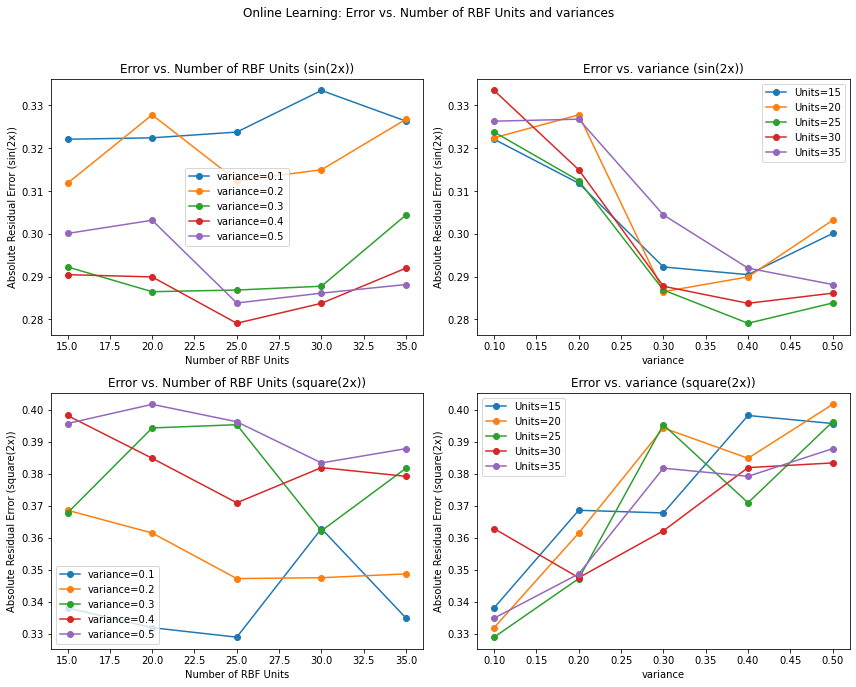

In [14]:
# Print and plot the results for online learning
print("Results for Online Learning:")
for i in range(len(results_online_learning['num_rbf_units'])):
    print(f"Num RBF Units: {results_online_learning['num_rbf_units'][i]}, Variance: {results_online_learning['variance'][i]}, "
          f"Error1: {results_online_learning['error1'][i]}, Error2: {results_online_learning['error2'][i]}")

# Plot the results for online learning
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Online Learning: Error vs. Number of RBF Units and variances')

for i, function_name in enumerate(['sin(2x)', 'square(2x)']):
    ax = axes[i, 0]
    ax.set_title(f'Error vs. Number of RBF Units ({function_name})')
    for variance in variance_range:
        condition = np.array([results_online_learning['variance'][j] == variance for j in range(len(results_online_learning['variance']))])
        ax.plot(np.array(results_online_learning['num_rbf_units'])[condition], np.array(results_online_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'variance={variance}')
    ax.set_xlabel('Number of RBF Units')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

    ax = axes[i, 1]
    ax.set_title(f'Error vs. variance ({function_name})')
    for num_rbf_units in num_rbf_units_range:
        condition = np.array([results_online_learning['num_rbf_units'][j] == num_rbf_units for j in range(len(results_online_learning['num_rbf_units']))])
        ax.plot(np.array(results_online_learning['variance'])[condition], np.array(results_online_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'Units={num_rbf_units}')
    ax.set_xlabel('variance')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# TODO : compare your optimal RBF network trained in batch mode with a single-hidden-layer perceptron trained with backprop


## 3-Competitive learning (CL) to initialise RBF units